In [1]:
SHOW_PLOT_FLAG = True

In [2]:
import sys

sys.path.insert(0, '../')

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from utils import *
from constants import *
import matplotlib.gridspec as gridspec


# Figure 11

## Loading Data (Per seconds)

In [3]:
cqiLess = pd.read_csv('CuratedData/UL_Tput_cqiless.txt', sep='\t')
cqimore = pd.read_csv('CuratedData/UL_Tput_cqimore.txt', sep='\t')

y = 'Tput'

In [4]:

def add_median_labels_US_noCA(ax, precision='.1f', flag='noCA'):
    lines = ax.get_lines()
    boxes = [c for c in ax.get_children() if type(c).__name__ == 'PathPatch']
    lines_per_box = int(len(lines) / len(boxes))
    level = 40
    l = 400
    for median in lines[4:len(lines):lines_per_box]:
        x, y = (data.mean() for data in median.get_data())
        value = x if (median.get_xdata()[1] - median.get_xdata()[0]) == 0 else y
        text = ax.text(x, y + level, f'{value:{precision}}', ha='center', va='center',
                        color='#800000', fontsize=11, zorder=20)
        level = 27
        

## Plotting Data

Showing Plot  Sec4_Fig11


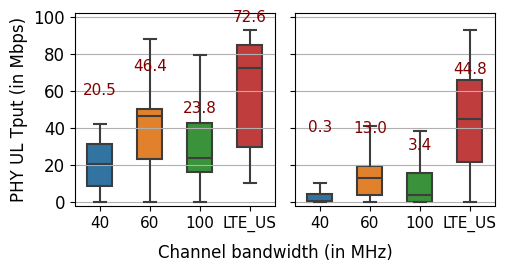

In [5]:
fig = plt.figure(figsize=(5, 3.5))
gs1 = gridspec.GridSpec(1, 2, wspace=0.1, hspace=0.2, top=.85, bottom=0.3, left=0.12, right=0.96, figure=fig)


# Plotting CQI > 12
ax0 = plt.subplot(gs1[0])

order = ['40', '60', '100', 'LTE_US']
g = sns.boxplot(x='Config', y='tput', data=cqimore , dodge=True,
                width=0.5, showfliers=False, order=order,
                fliersize=0, ax=ax0)
add_median_labels_US_noCA(ax0)
ax0.yaxis.grid(True, which='major')
ax0.set_ylim(-2, 102)
ax0.set_yticks([i for i in range(0, 102, 20)])#, fontsize=14)
ax0.set_yticklabels([t for t in range(0, 102, 20)], fontsize=12)
ax0.set_ylabel('PHY UL Tput (in Mbps)', fontsize=12)
ax0.set_xlabel('Channel bandwidth (in MHz)', fontsize=12)

ax0.set_xticklabels(['40', '60', '100', 'LTE_US'], fontsize=11)

# ax0.yaxis.set_label_coords(-0.25, 0.4)
ax0.xaxis.set_label_coords(1, -0.2)


# Plotting CQI < 10
ax1 = plt.subplot(gs1[1])
sns.boxplot(x='Config', y='tput', data=cqiLess, dodge=True, width=0.5, showfliers=False, 
                order=order,  fliersize=0, ax=ax1)

ax1.set_ylim(-2, 102)
ax1.set_yticks([i for i in range(0, 102, 20)])#, fontsize=14)
ax1.set_yticklabels('', fontsize=12)
ax1.set_ylabel('', fontsize=12)
ax1.set_xlabel('', fontsize=12)
ax1.yaxis.grid(True, which='major')
add_median_labels_US_noCA(ax1)
ax1.set_xticklabels(['40', '60', '100', 'LTE_US'], fontsize=11)



#### Showing plots
plot_name = 'Fig11'
plotme(plt, " Sec4", plot_name, show_flag=SHOW_PLOT_FLAG)
plt.close(fig)
